Number of nodes:  2708
Number of edges:  5429


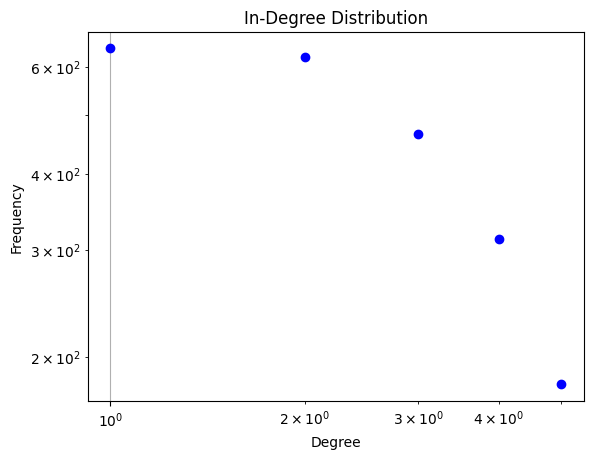

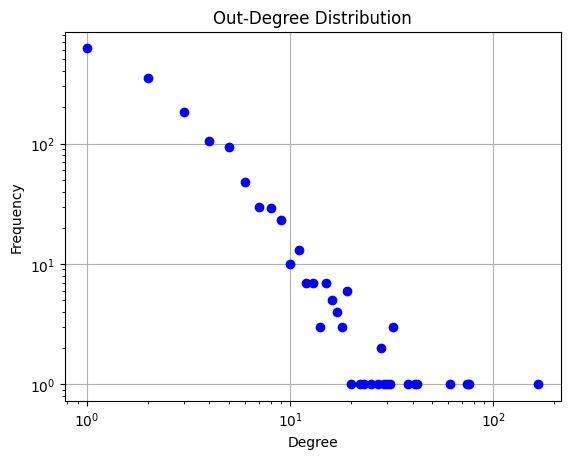

In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict

def load_edge_list(file_path):
    edges = []
    nodes = set()
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#'):# or not line.strip():
                continue
            source, target = map(int, line.split(','))
            edges.append((source, target))
            nodes.update([source, target])
    return nodes, edges

def compute_degrees(edges):
    in_degree = defaultdict(int)
    out_degree = defaultdict(int)
    for source, target in edges:
        out_degree[source] += 1
        in_degree[target] += 1
    return in_degree, out_degree

def plot_degree_distribution(degree_dict, title, output_file):
    degrees = list(degree_dict.values())
    max_degree = max(degrees)
    frequency = [0] * (max_degree + 1)
    for degree in degrees:
        frequency[degree] += 1
    plt.figure()
    plt.loglog(range(max_degree + 1), frequency, 'bo')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.savefig(output_file)
    plt.show()
    plt.close()

file_path = 'Q2_Cora.csv'  
nodes, edges = load_edge_list(file_path)
print("Number of nodes: ",len(nodes))
print("Number of edges: ",len(edges))
in_degree, out_degree = compute_degrees(edges)

plot_degree_distribution(in_degree, 'In-Degree Distribution', 'in_degree_distribution.png')
plot_degree_distribution(out_degree, 'Out-Degree Distribution', 'out_degree_distribution.png')

